In [1]:
import ipywidgets as widgets
import pandas as pd
import pingouin as pg

In [2]:
filepath = "C:\\Users\\anton\\OneDrive - TSE Systems, Inc\\Desktop\\actimot.csv"

In [3]:
df = pd.read_csv(
    filepath,
    delimiter=";",
    decimal=",",
)

df["DateTime"] = pd.to_datetime(df["DateTime"], format='%d.%m.%Y %H:%M:%S-%f')

C:\Users\anton\AppData\Local\Temp\ipykernel_21564\3235272442.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [4]:
display(df)

,DateTime,Rel. [s],BoxNr,X (cm),Y (cm),Z (cm),X,Y,Z,X1,...,Z55,Z56,Z57,Z58,Z59,Z60,Z61,Z62,Z63,Z64
0,2019-05-09 15:38:37.509,0.000,1,18.875,"4,063",26.500,000FFFFF8000FFFFFFF,000FFFFFE3F,000E001FBFEFFFFFFFF,1,...,0,0,0,0,0,0,0,1,1,1
1,2019-05-09 15:38:37.536,0.027,1,18.35,"4,063",27.269,000FFFFF8000FFFFFFF,000FFFFFE3F,000E001FBFFFFFFFFFF,1,...,0,0,0,0,0,0,0,1,1,1
2,2019-05-09 15:38:38.516,1.007,1,18.35,"4,063",26.300,000FFFF00003E7FFFFF,000FFFFF87F,000E001E7FDFFFFFFFF,1,...,0,0,0,0,0,0,0,1,1,1
3,2019-05-09 15:38:39.557,2.047,1,17.917,"6,250",26.536,000FFFFC007FFFFFFFF,000FFFFFF1F,000E001F7FEFFFFFFFF,1,...,0,0,0,0,0,0,0,1,1,1
4,2019-05-09 15:38:40.517,3.008,1,16.625,"7,850",24.175,000FFFFFFEFF7FFFFFF,000FFFFFFFF,000E001FB02FFFFFFFF,1,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40114,2019-05-10 11:09:16.680,70239.171,1,21.0,13.75,26.500,000FFFF800FFFFFFFFF,000C0FFFFFF,000E001FBFEFFFFFFFF,1,...,0,0,0,0,0,0,0,1,1,1
40115,2019-05-10 11:09:39.505,70261.996,1,20.964,13.786,26.500,000FFFF8007FFFFFFFF,000C0FFFFFF,000E001FBFEFFFFFFFF,1,...,0,0,0,0,0,0,0,1,1,1
40116,2019-05-10 11:09:39.545,70262.036,1,20.917,13.792,26.500,000FFFF800FFFFFFFFF,000C0FFFFFF,000E001FBFEFFFFFFFF,1,...,0,0,0,0,0,0,0,1,1,1
40117,2019-05-10 11:09:40.705,70263.196,1,21.05,13.8,26.500,000FFFF000FFFFFFFFF,000C0FFFFFF,000E001FBFEFFFFFFFF,1,...,0,0,0,0,0,0,0,1,1,1


In [5]:
result = df.groupby(["BoxNr"], dropna=False, observed=False).resample("1D", on="DateTime", origin="start")
result = result.sum(numeric_only=True)

In [6]:
display(result)

,,Rel. [s],BoxNr,Z (cm),X1,X2,X3,X4,X5,X6,X7,...,Z55,Z56,Z57,Z58,Z59,Z60,Z61,Z62,Z63,Z64
BoxNr,DateTime,,,,,,,,,,,,,,,,,,,,,
1,2019-05-09 15:38:37.509,1.267701e+09,40119,1044122.697,40119,39859,39723,39521,39033,37368,37260,...,0,0,0,0,0,0,0,38776,38795,40119


In [7]:
x_range = range(1, 64)
y_range = range(1, 32)

datetime_col = []
x_col = []
y_col = []
presence_col = []

for index, row in df.iterrows():
    for index_x in x_range:
        for index_y in y_range:
            x = row[f"X{index_x}"]
            y = row[f"Y{index_y}"]
            datetime_col.append(row["DateTime"])
            x_col.append(index_x)
            y_col.append(index_y)
            presence_col.append(x == 0 and y == 0)

In [8]:
new_df = pd.DataFrame.from_dict({
    "DateTime": datetime_col,
    "X": x_col,
    "Y": y_col,
    "Presence": presence_col
})

In [9]:
display(new_df)

,DateTime,X,Y,Presence
0,2019-05-09 15:38:37.509,1,1,False
1,2019-05-09 15:38:37.509,1,2,False
2,2019-05-09 15:38:37.509,1,3,False
3,2019-05-09 15:38:37.509,1,4,False
4,2019-05-09 15:38:37.509,1,5,False
...,...,...,...,...
78352402,2019-05-10 11:10:13.572,63,27,False
78352403,2019-05-10 11:10:13.572,63,28,False
78352404,2019-05-10 11:10:13.572,63,29,False
78352405,2019-05-10 11:10:13.572,63,30,False


In [19]:
new_df = new_df.astype(
    {
        "X": "category",
        "Y": "category",
        "Presence": int,
    }
)
result = new_df.groupby(["X", "Y"], dropna=False, observed=False).resample("1D", on="DateTime", origin="start")

In [20]:
result = result.sum(numeric_only=True)
result = result.reset_index()
display(result)

,X,Y,DateTime,Presence
0,1,1,2019-05-09 15:38:37.509,0
1,1,2,2019-05-09 15:38:37.509,0
2,1,3,2019-05-09 15:38:37.509,0
3,1,4,2019-05-09 15:38:37.509,0
4,1,5,2019-05-09 15:38:37.509,0
...,...,...,...,...
1948,63,27,2019-05-09 15:38:37.509,189
1949,63,28,2019-05-09 15:38:37.509,227
1950,63,29,2019-05-09 15:38:37.509,228
1951,63,30,2019-05-09 15:38:37.509,223


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,10)})

x = result["X"].astype(float)
y = result["Y"].astype(float)
z = result["Presence"].astype(float)

glue = result.pivot(index="Y", columns="X", values="Presence")
display(glue)

X,1,2,3,4,5,6,7,8,9,10,...,54,55,56,57,58,59,60,61,62,63
Y,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,118,162,217,290,509,510,490,478,490,...,44,42,39,42,40,55,71,81,89,83
4,0,128,179,246,344,647,653,636,617,614,...,73,68,63,63,57,65,73,85,93,88
5,0,141,196,274,394,771,780,757,733,719,...,102,97,90,85,76,76,78,87,91,86
6,0,154,216,299,435,886,903,885,859,819,...,141,134,124,115,103,89,73,74,79,77
7,0,169,241,336,489,1048,1067,1047,1007,961,...,205,197,183,171,152,106,61,53,60,58
8,0,164,248,347,541,1163,1182,1188,1148,1085,...,257,249,233,214,183,120,51,37,42,41
9,0,138,204,289,471,1040,1069,1083,1048,973,...,259,253,240,219,191,129,54,39,44,41


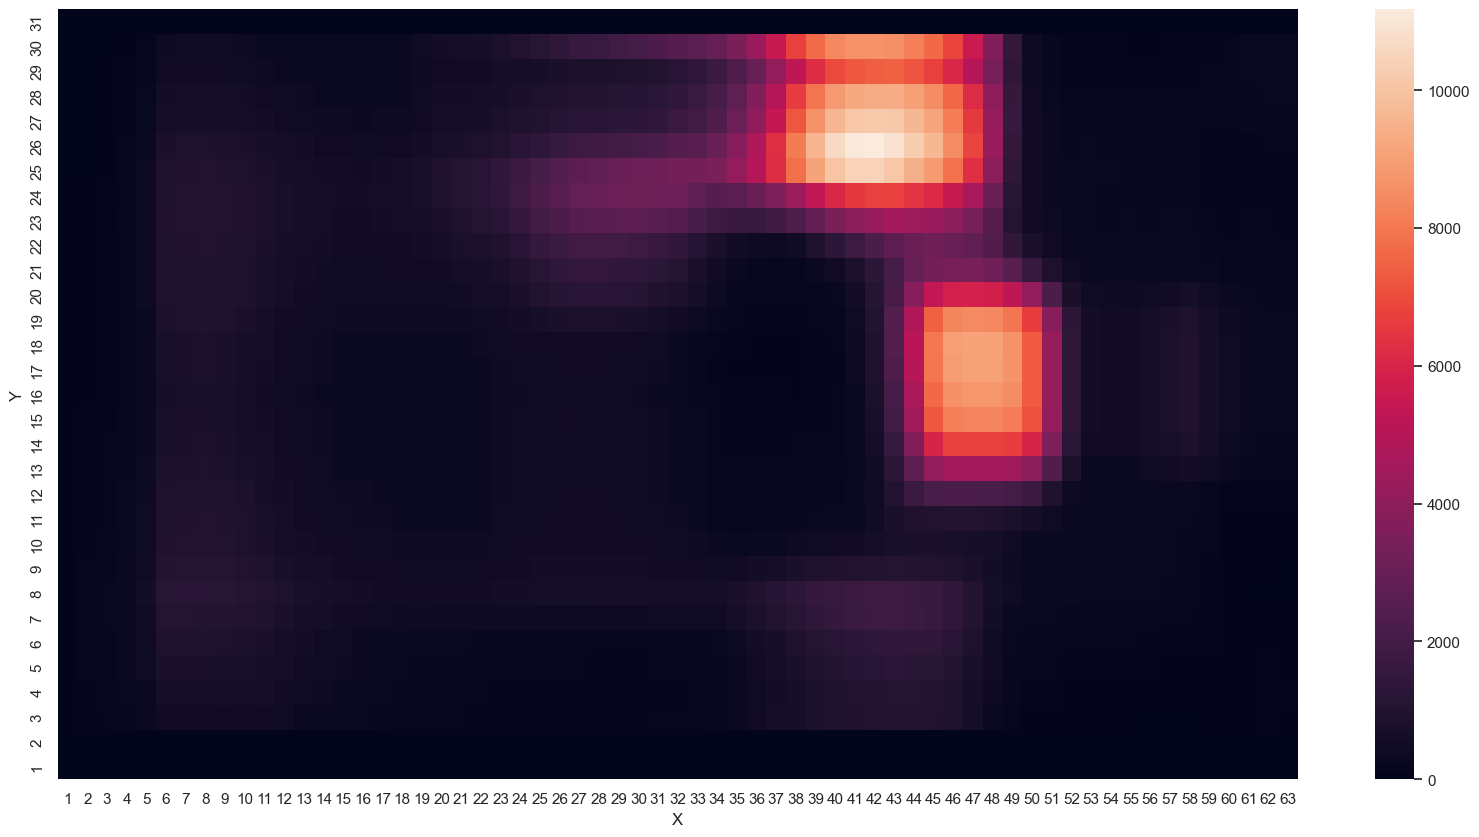

In [31]:
ax = sns.heatmap(glue, square=False)
ax.invert_yaxis()